In [1]:
##########################################################
#  Python script template for Question 1 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics
from helpers.iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *

#<----

/Users/davemalvin/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
# Load files and normalize data
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("data")
Xtrn_orig = Xtrn
Xtst_orig = Xtst
Xtrn = Xtrn/255
Xtst = Xtst/255
Xmean = mean(Xtrn)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

# Question 1.1

In [3]:
# Q1.1
print("The first 4 elements for the training sample:")
print(Xtrn_nm[0,0:4])
print("The last 4 elements for the training sample:")
print(Xtrn_nm[-1,0:4])

The first 4 elements for the training sample:
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
The last 4 elements for the training sample:
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


# Question 1.2

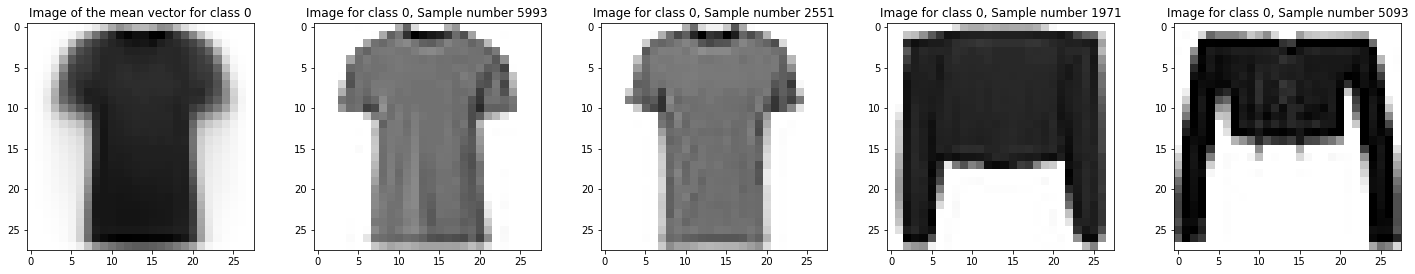

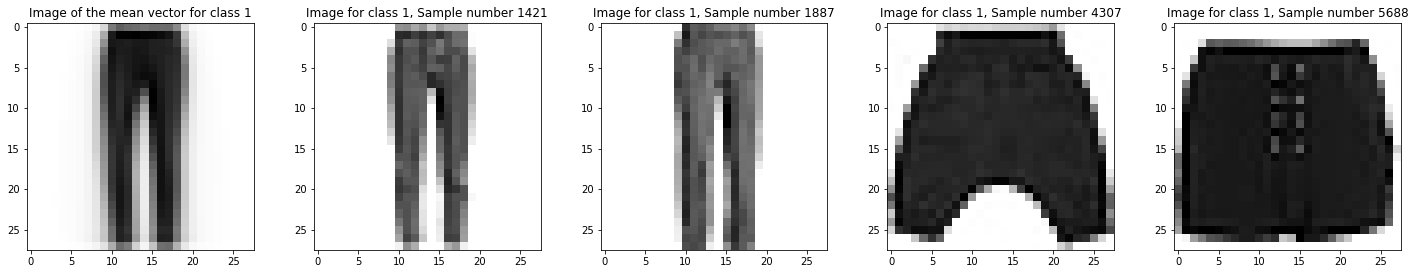

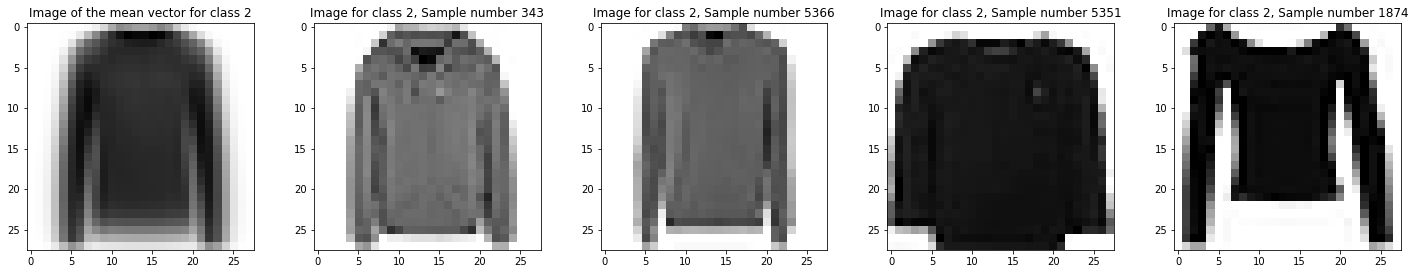

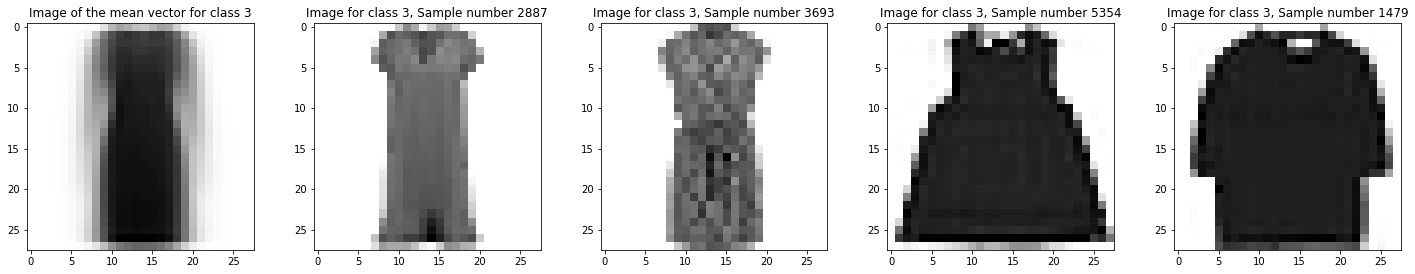

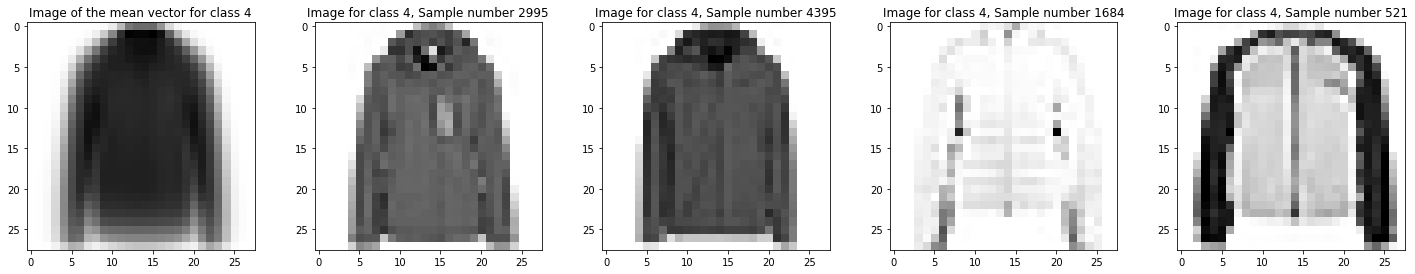

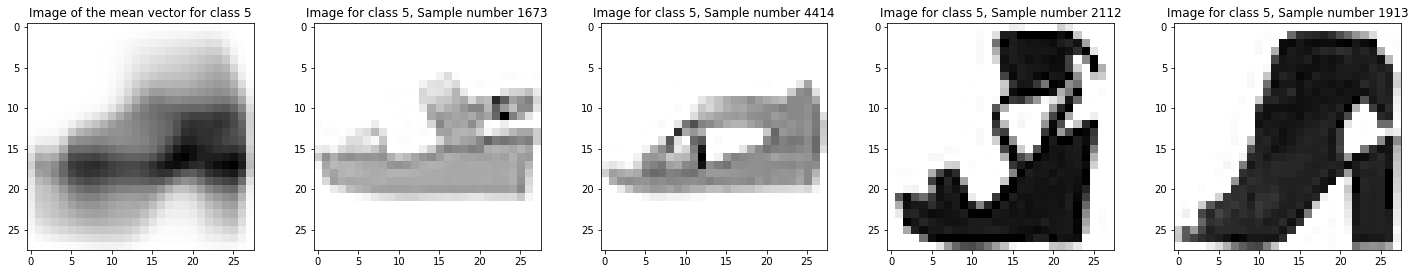

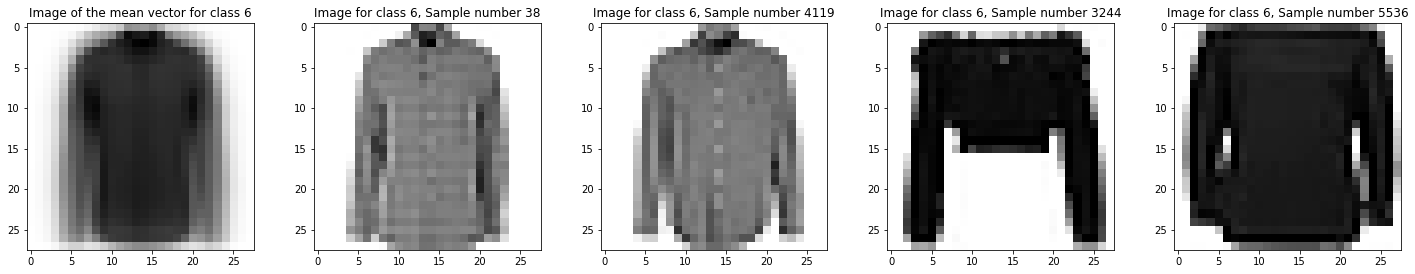

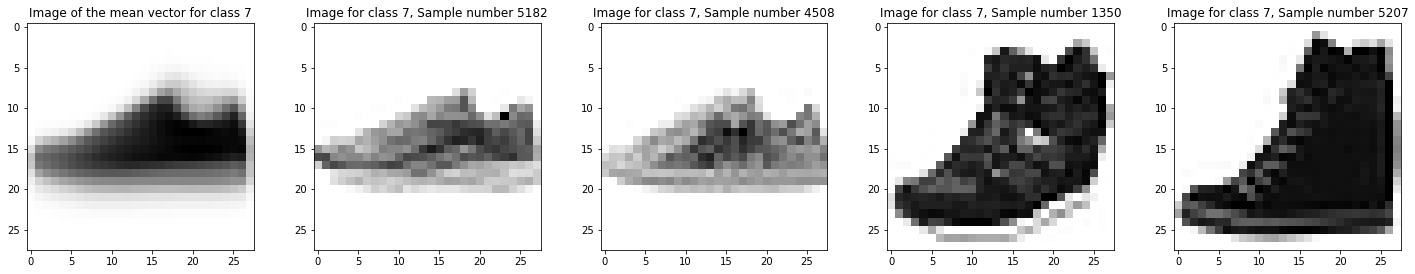

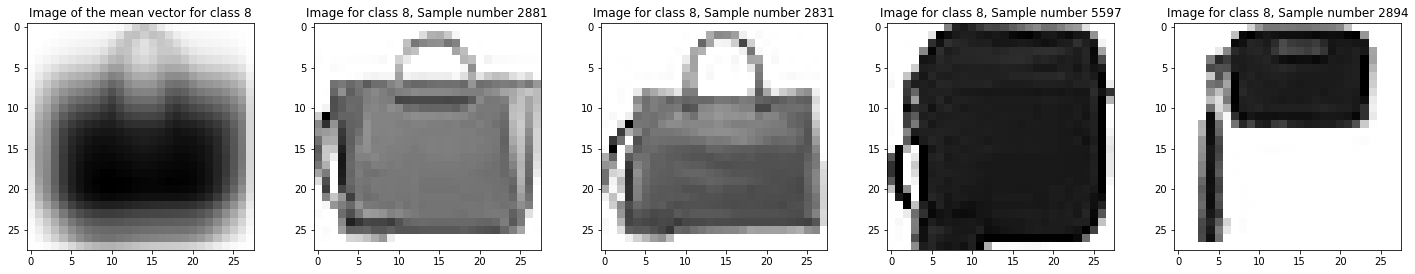

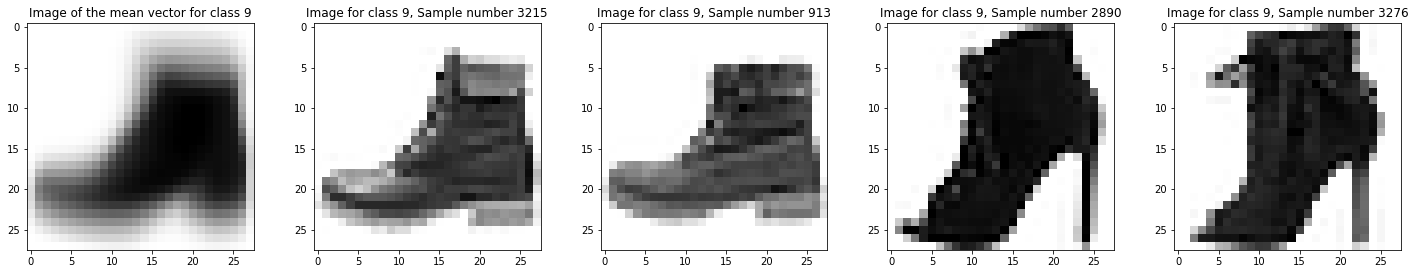

In [4]:
# Q1.2
for i in range(0,10):
    idx = np.where(Ytrn == i)
    distances = []
    currXtrn = Xtrn[idx[0]]
    currMean = mean(currXtrn)
    for j in idx[0]:
        d = Euclid(Xtrn[j], currMean)
        distances.append(d)
    first_closest = distances.index(min(distances))
    distances[first_closest] = 100
    second_closest = distances.index(min(distances))
    distances[first_closest] = -1
    first_furthest = distances.index(max(distances))
    distances[first_furthest] = -1
    second_furthest = distances.index(max(distances))

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(20,40))
    ax1.imshow(currMean.reshape(28,28), cmap='gray_r')
    ax1.set_title("Image of the mean vector for class " + str(i))
    ax2.imshow(currXtrn[first_closest].reshape(28,28), cmap='gray_r')
    ax2.set_title("Image for class {}, Sample number {}".format(i,first_closest))
    ax3.imshow(currXtrn[second_closest].reshape(28,28), cmap='gray_r')
    ax3.set_title("Image for class {}, Sample number {}".format(i,second_closest))
    ax4.imshow(currXtrn[second_furthest].reshape(28,28), cmap='gray_r')
    ax4.set_title("Image for class {}, Sample number {}".format(i,second_furthest))
    ax5.imshow(currXtrn[first_furthest].reshape(28,28), cmap='gray_r')
    ax5.set_title("Image for class {}, Sample number {}".format(i,first_furthest))
    fig.tight_layout()

# Question 1.3

In [5]:
# Q1.3
pca = PCA()
projected = pca.fit_transform(Xtrn_nm)
var = pca.explained_variance_
var[:5]

array([19.80980567, 12.11221047,  4.10615661,  3.38182839,  2.62477022])

# Question 1.4

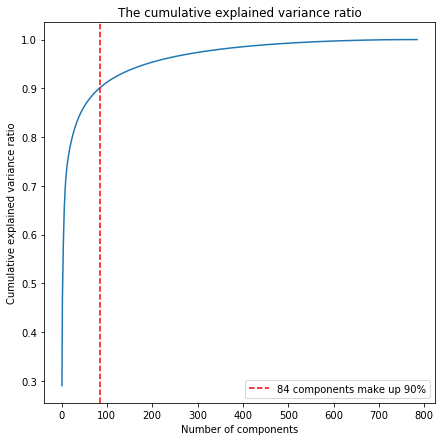

In [6]:
# Q1.4
var_ratio = pca.explained_variance_ratio_
cumvar_ratio = np.cumsum(var_ratio)

# Get index of 90% mark
idx = 0
total = 0
for i in var_ratio:
    idx += 1
    total += i
    if total >= 0.9:
        break
        
plt.figure(figsize=(7,7))
plt.plot(np.arange(1,785), cumvar_ratio, label='_nolegend_')
plt.axvline(idx, ls='--', color='r')
plt.legend([str(idx) + ' components make up 90%'])
plt.title("The cumulative explained variance ratio")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

# Question 1.5

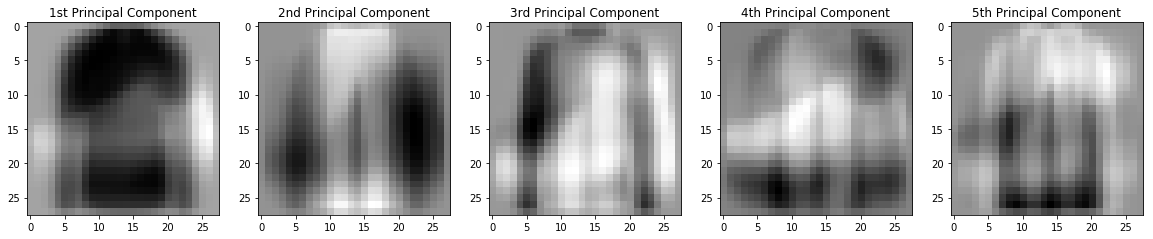

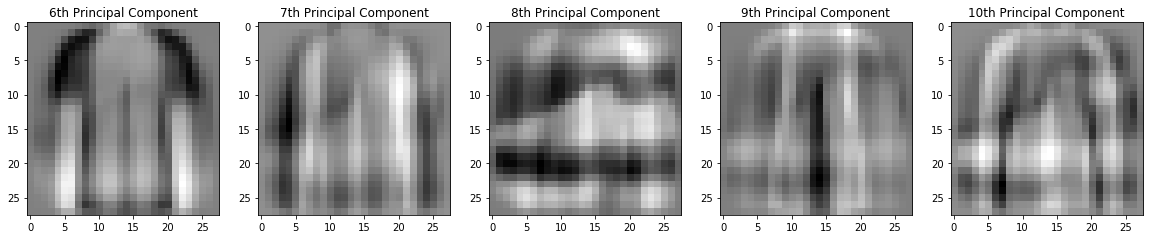

In [7]:
# Q1.5
i = 0
li = ["1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th"]

fig, axs = plt.subplots(1,5,figsize=(20,40))
for idx,pc in enumerate(pca.components_[:5]):
    axs[idx].imshow(pc.reshape(28,28), cmap='gray_r')
    axs[idx].set_title(li[idx] + " Principal Component")
    
fig, axs = plt.subplots(1,5,figsize=(20,40))
for idx,pc in enumerate(pca.components_[5:10]):
    axs[idx].imshow(pc.reshape(28,28), cmap='gray_r')
    axs[idx].set_title(li[idx+5] + " Principal Component")

# Question 1.6

In [8]:
# Q1.6
for K in [5,20,50,200]:
    pca_K = PCA(n_components=K)
    sample = pca_K.fit_transform(Xtrn_nm)
    retransformed = pca_K.inverse_transform(sample)
    for i in range(10):
        # Get the first sample for class i
        idx = np.where(Ytrn == i)
        originalSample = Xtrn_nm[idx[0]][0] # Shape (784,)
        reconstructed = retransformed[idx[0]][0] # Shape (784,)
        rmse = metrics.mean_squared_error(reconstructed, originalSample)**0.5
        print("Class {}, K={} --> {}".format(i,K,rmse))

Class 0, K=5 --> 0.2561486631252596
Class 1, K=5 --> 0.19802439536517574
Class 2, K=5 --> 0.1987001577007755
Class 3, K=5 --> 0.14565797914946274
Class 4, K=5 --> 0.11820870267205949
Class 5, K=5 --> 0.18112976160046923
Class 6, K=5 --> 0.12947927741433132
Class 7, K=5 --> 0.16562538035989352
Class 8, K=5 --> 0.223396587675378
Class 9, K=5 --> 0.18351042087035754
Class 0, K=20 --> 0.14986989613548282
Class 1, K=20 --> 0.14046158915951848
Class 2, K=20 --> 0.1456047455915864
Class 3, K=20 --> 0.10722408238816361
Class 4, K=20 --> 0.10259909779323893
Class 5, K=20 --> 0.15882602771487442
Class 6, K=20 --> 0.09589965913025926
Class 7, K=20 --> 0.12771598899515568
Class 8, K=20 --> 0.1451205010853848
Class 9, K=20 --> 0.15103646873775955
Class 0, K=50 --> 0.12728313588220344
Class 1, K=50 --> 0.09581721407202853
Class 2, K=50 --> 0.12375344538803087
Class 3, K=50 --> 0.08338399150976399
Class 4, K=50 --> 0.0874949054932079
Class 5, K=50 --> 0.14284505390596208
Class 6, K=50 --> 0.072032726

# Question 1.7

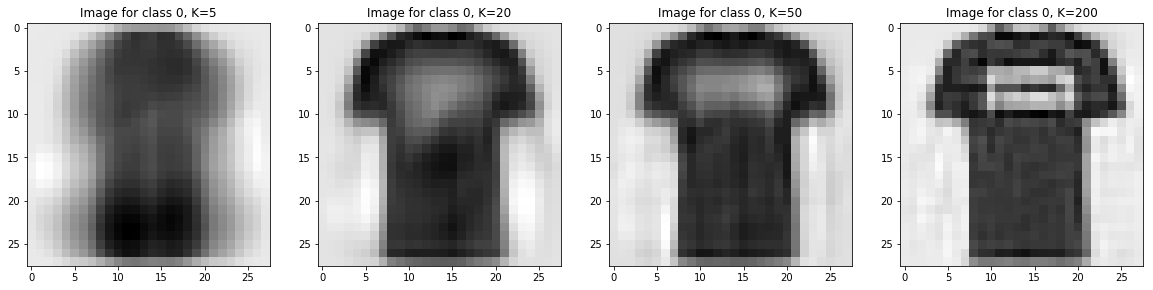

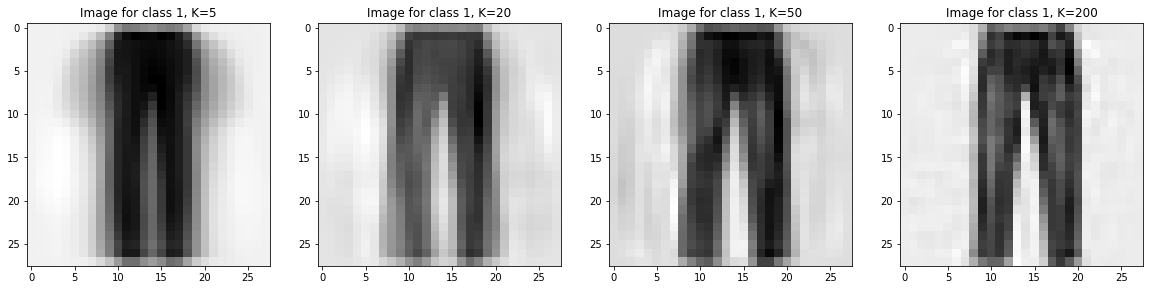

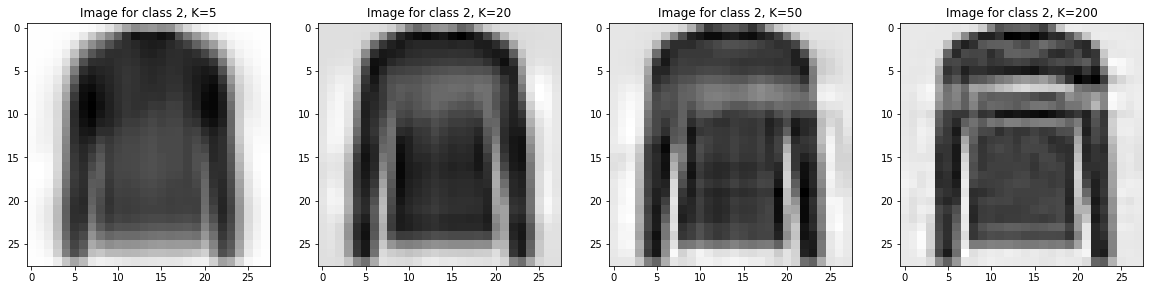

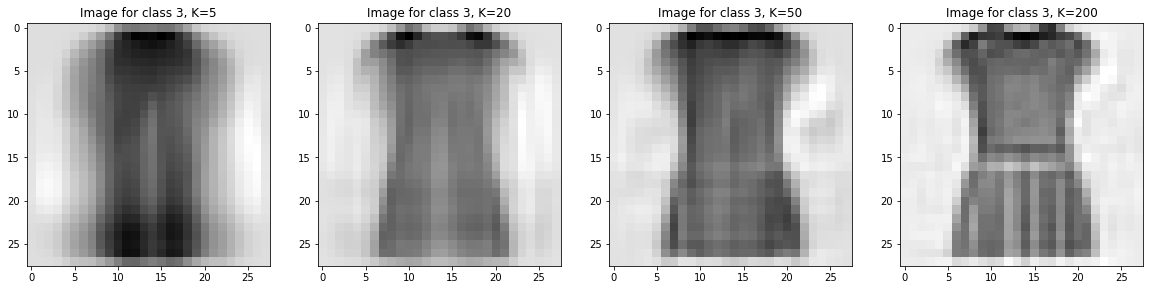

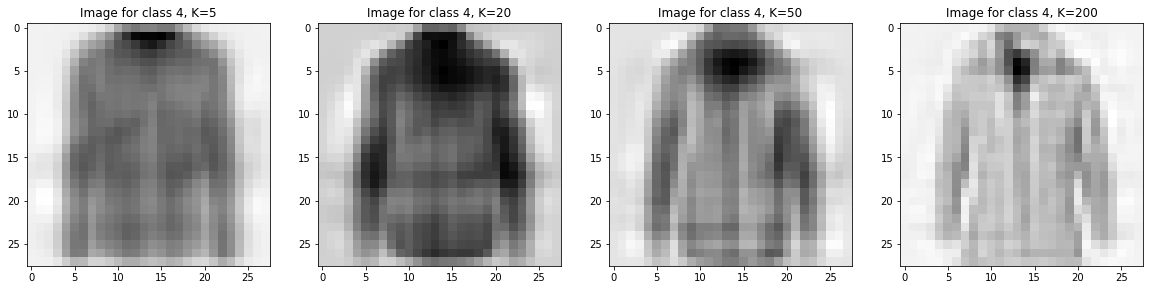

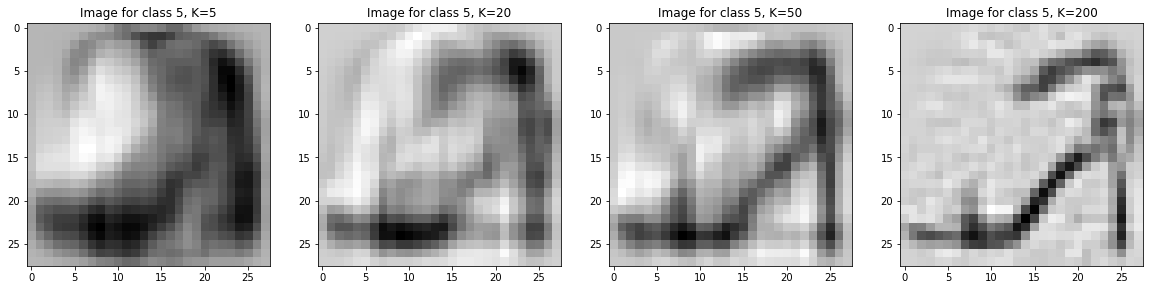

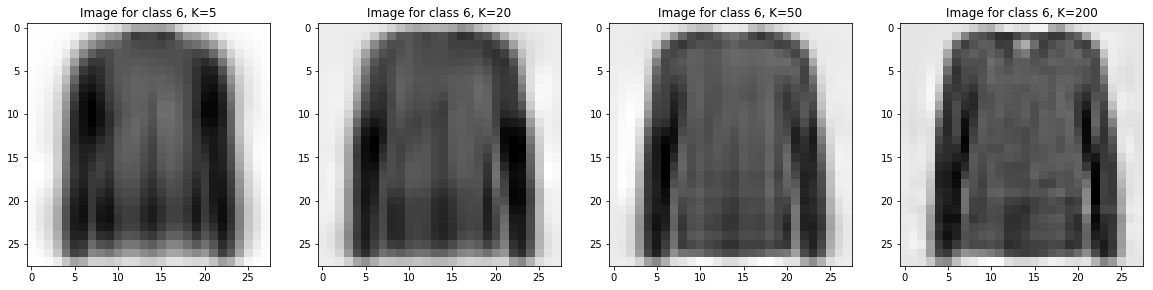

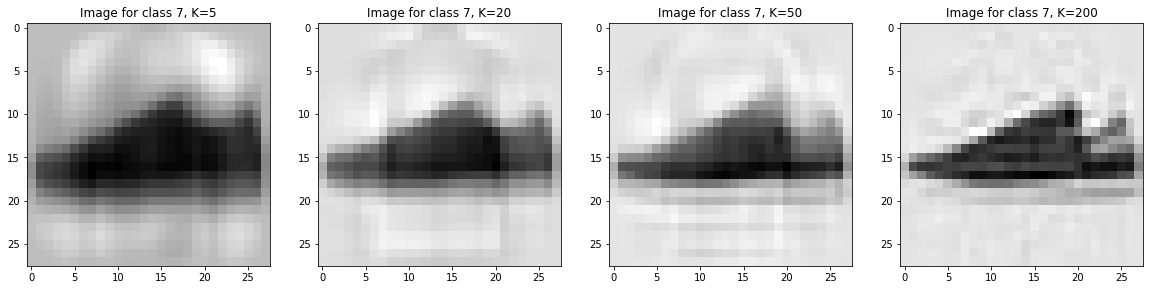

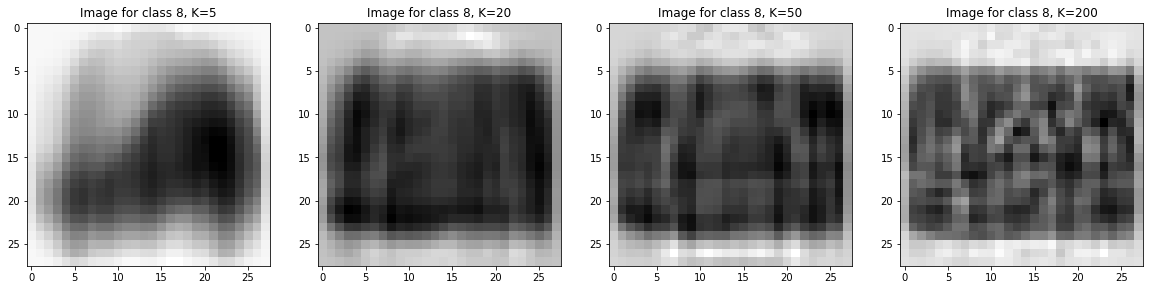

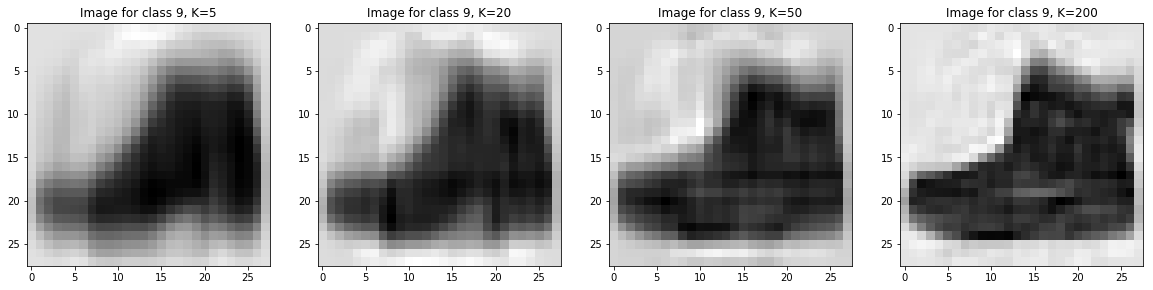

In [9]:
# Q1.7
for i in range(10):
    # Find the first sample for class i
    idx = np.where(Ytrn == i)
    firstSample = Xtrn_nm[idx[0]][0]
    
    # Project the first sample onto the PCA space
    tform = pca.transform(firstSample.reshape(1,-1)).flatten()
    ctr = 0
    fig, axs = plt.subplots(1,4,figsize=(20,40))
    for K in [5, 20, 50, 200]:
        tform_K = []
        # Get projection onto K-dimensional space 
        for j in tform[:K]:
            tform_K.append(j)
        # Reconstruct sample
        rebuild = Xmean + np.dot(tform_K[:K], pca.components_[:K])
        axs[ctr].imshow(rebuild.reshape(28,28), cmap='gray_r')
        axs[ctr].set_title("Image for class " + str(i) + ", K=" + str(K))
        ctr += 1

# Question 1.8

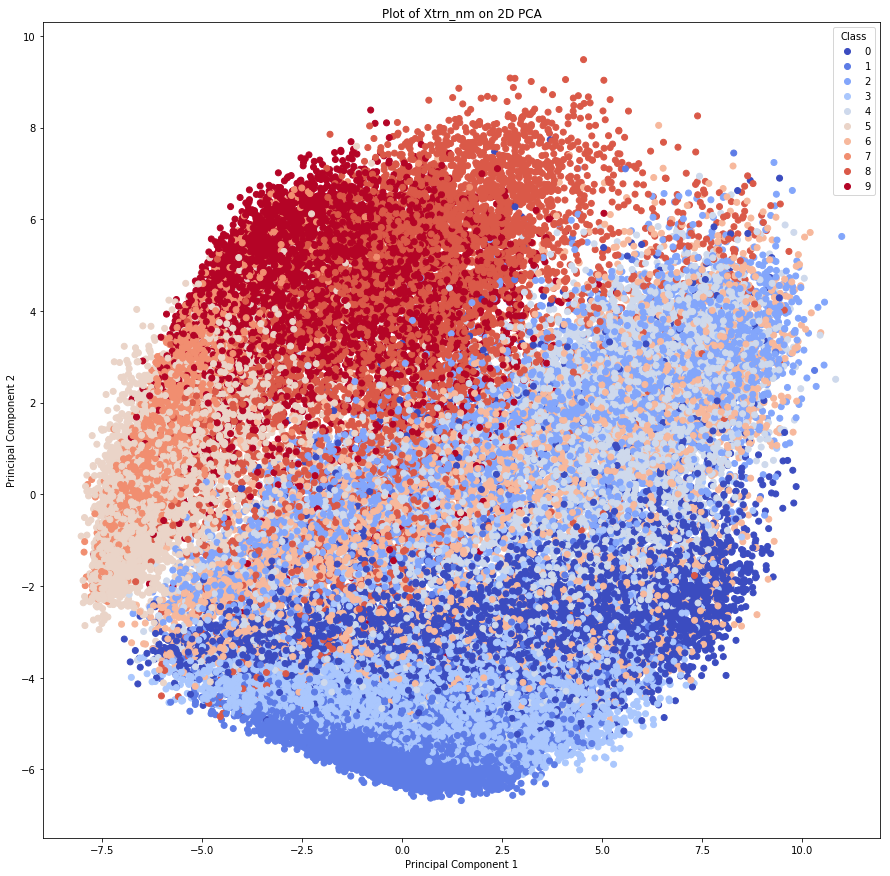

In [10]:
# Q1.8
plt.figure(figsize=(15,15))
scatter = plt.scatter(projected[:,0], projected[:,1], c=Ytrn, cmap=plt.cm.get_cmap('coolwarm', 10))
labels = np.unique(Ytrn)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels, title="Class")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Plot of Xtrn_nm on 2D PCA")
plt.show()